# Handling Dates, Times, and Time Series Data

In this notebook, we'll focus on working with time-based data correctly using Pandas. By the end of this notebook, we will:
- Understand how date and time information is handled in Pandas
- Convert raw date columns into proper datetime objects
- Set up a time-aware index
- Explore sorting, filtering, and slicing using time
- Learn how to aggregate meal-level data into daily data
- Build intuition for resampling and rolling operations

Okay here's an important thing before we jump into the code. This notebook is not about forecasting or advanced statistics. It is about building a strong foundation, because everything else depends on this.😉

## Import Required Libraries

Let's import the libraries we'll be working throughout this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We'll use Pandas for Time Series Handling and Matplotlib for clear time-based visualizations.

## Load the Dataset

Let's now load the dataset we generated in the first notebook. If you'd like, you can go back and review the data generation code, but since we're focusing on handling time-based data in this notebook, you can skip it for now.

In [2]:
df = pd.read_csv("nutrition_data.csv")
df.head(10)

,Date,Meal,Food_Item,Calories,Protein_g,Carbs_g,Fat_g,Meal_Time,Water_ml
0,2022-01-11,Breakfast,Pancakes,349.0,15.0,67.3,NaN,08:00,2036.0
1,2022-01-11,Lunch,Chicken,271.0,10.2,NaN,22.2,13:00,NaN
2,2022-01-11,Supper,Nuts,613.0,28.0,63.5,NaN,17:00,378.0
3,2022-01-11,Dinner,Fish,514.0,10.6,40.0,14.5,20:30,133.0
4,2022-01-12,Breakfast,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-01-12,Lunch,Chicken,451.0,NaN,63.9,NaN,13:00,116.0
6,2022-01-12,Supper,Yogurt,616.0,39.0,48.2,15.6,NaN,1977.0
7,2022-01-12,Dinner,Roti,385.0,10.2,78.0,NaN,20:30,845.0
8,2022-01-13,Breakfast,Poha,284.0,26.5,32.8,27.3,08:00,59.0
9,2022-01-13,Lunch,Chicken,291.0,25.4,38.1,32.2,13:00,337.0


## Basic Dataset Overview

Before touching dates, always understand what you're working with. So, let's do some basic exploration of our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5780 non-null   object 
 1   Meal       5780 non-null   object 
 2   Food_Item  4369 non-null   object 
 3   Calories   4369 non-null   float64
 4   Protein_g  3860 non-null   float64
 5   Carbs_g    3843 non-null   float64
 6   Fat_g      3822 non-null   float64
 7   Meal_Time  4037 non-null   object 
 8   Water_ml   3923 non-null   float64
dtypes: float64(5), object(4)
memory usage: 406.5+ KB


Notice:
- Date is currently of type object
- This means Pandas does not yet recognize it as time

This is our first fix. Let's convert our `Date` to a proper `datetime` format.

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

#### Let's check the Data Type again

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5780 non-null   datetime64[ns]
 1   Meal       5780 non-null   object        
 2   Food_Item  4369 non-null   object        
 3   Calories   4369 non-null   float64       
 4   Protein_g  3860 non-null   float64       
 5   Carbs_g    3843 non-null   float64       
 6   Fat_g      3822 non-null   float64       
 7   Meal_Time  4037 non-null   object        
 8   Water_ml   3923 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 406.5+ KB


Awesome! `Date` is now `datetime64[ns]`, which means we can do all sorts of things like filtering by date, resampling, rolling calculations, time-based indexing, and more.

## Creating a Time-Aware Index

For time series analysis, it's best to use the date column as the index.

In [6]:
df = df.sort_values("Date")
df = df.set_index("Date")

#### Why this matters?
- Pandas time operations work best on a DatetimeIndex
- Sorting ensures chronological order
- Many methods assume ordered time data

#### Let’s verify:

In [7]:
df.index

DatetimeIndex(['2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11',
               '2022-01-12', '2022-01-12', '2022-01-12', '2022-01-12',
               '2022-01-13', '2022-01-13',
               ...
               '2025-12-23', '2025-12-23', '2025-12-24', '2025-12-24',
               '2025-12-24', '2025-12-24', '2025-12-25', '2025-12-25',
               '2025-12-25', '2025-12-25'],
              dtype='datetime64[ns]', name='Date', length=5780, freq=None)

### Handling Missing Time Information (`Meal_Time`)

The `Meal_Time` column is not used as the main time index as it represents event metadata, not timeline structure. So we'll keep it as-is and don't force it into datetime unnecessarily.

This is an important modeling decision.

## Filtering Data by Date Range

One of the biggest advantages of time indexing is easy slicing.

In [8]:
df.loc["2023"]

,Meal,Food_Item,Calories,Protein_g,Carbs_g,Fat_g,Meal_Time,Water_ml
Date,,,,,,,,
2023-01-01,Breakfast,Toast,492.0,19.2,38.6,28.7,08:00,516.0
2023-01-01,Lunch,Chicken,651.0,12.6,27.0,26.8,13:00,786.0
2023-01-01,Supper,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,Dinner,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,Dinner,Vegetables,321.0,NaN,61.6,15.5,20:30,102.0
...,...,...,...,...,...,...,...,...
2023-12-30,Dinner,Roti,523.0,NaN,NaN,NaN,20:30,NaN
2023-12-31,Dinner,Vegetables,501.0,20.3,66.9,31.1,20:30,NaN
2023-12-31,Breakfast,Toast,440.0,24.8,77.6,18.3,08:00,480.0


#### We can also filter specific ranges.

In [9]:
df.loc["2023-06":"2023-08"]

,Meal,Food_Item,Calories,Protein_g,Carbs_g,Fat_g,Meal_Time,Water_ml
Date,,,,,,,,
2023-06-01,Dinner,Tofu,448.0,26.2,30.9,34.9,20:30,230.0
2023-06-01,Breakfast,Oats,346.0,16.1,83.8,33.7,08:00,NaN
2023-06-01,Lunch,Curd,601.0,25.1,38.2,23.0,13:00,778.0
2023-06-01,Supper,Yogurt,508.0,44.7,41.4,20.7,17:00,576.0
2023-06-02,Dinner,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-08-30,Dinner,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-31,Breakfast,Pancakes,336.0,23.5,47.4,24.0,08:00,510.0
2023-08-31,Lunch,Paneer,606.0,12.5,83.6,12.4,13:00,576.0


A lot of NaNs are appearing, but let's keep it as-is for now.


## Aggregating Meal-Level Data to Daily Level

Many analyses work better at a daily level. Let's aggregate calories per day.

In [10]:
daily_calories = df.groupby(df.index).agg({
    "Calories": "sum"
})
daily_calories.head()

,Calories
Date,
2022-01-11,1747.0
2022-01-12,1452.0
2022-01-13,1210.0
2022-01-14,2053.0
2022-01-15,1066.0


#### Why aggregation is important?

- Forecasting usually needs one value per time step
- Noise reduces when we aggregate
- Patterns become clearer


## Resampling Daily Data

Instead of manual grouping, we'll use Pandas `resample()` for a cleaner and more efficient approach here.

In [11]:
daily_calories_resampled = df["Calories"].resample("D").sum()
daily_calories_resampled.head()

Date
2022-01-11    1747.0
2022-01-12    1452.0
2022-01-13    1210.0
2022-01-14    2053.0
2022-01-15    1066.0
Freq: D, Name: Calories, dtype: float64

At first glance, `groupby(df.index)` and `resample("D")` give the same result because our data is already indexed by dates and there are no missing days. But the advantages of `resample()` become clear when you start dealing with time-series data that has gaps or needs frequency changes. Here's why `resample()` is often better:

### 1. Handles missing dates automatically

`resample("D")` will include all dates in the range, even if there were no entries for some days, and fill them with `NaN` or `0` if you want.

### 2. Easy frequency conversion

With `resample()`, we can quickly switch frequency:
- Daily to weekly: `resample("W")`
- Daily to monthly: `resample("ME")` 
    - `ME` refers to Month End and, `MS` to Month Start.
    - `M` works for now, but Pandas will give you a FutureWarning.
- Even hourly, quarterly, etc.

### 3. Built-in aggregation and time-based methods

`resample()` integrates nicely with:
- `.sum()`, `.mean()`, `.max()`, etc.
- `.ffill()` or `.bfill()` for filling missing values
- Rolling/window calculations aligned with time

`groupby()` is more general-purpose but doesn’t natively handle time-series-specific resampling logic.

#### Okay, let's visualize it now.

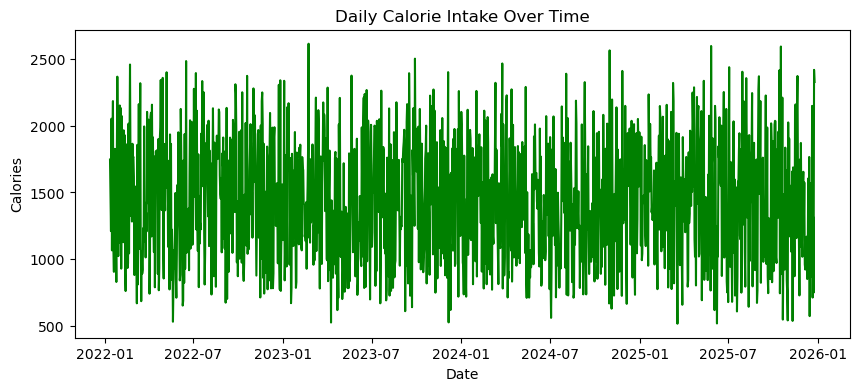

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(daily_calories_resampled, c="g")
plt.title("Daily Calorie Intake Over Time")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.show()

Don't worry about noise yet, we'll handle that later.😂


## Weekly and Monthly Resampling

Resampling allows us to change time resolution easily.

In [13]:
weekly_calories = daily_calories_resampled.resample("W").mean()
weekly_calories.head()

Date
2022-01-16    1560.833333
2022-01-23    1361.714286
2022-01-30    1586.142857
2022-02-06    1648.428571
2022-02-13    1405.571429
Freq: W-SUN, Name: Calories, dtype: float64

In [14]:
monthly_calories = daily_calories_resampled.resample("ME").mean()
monthly_calories.head()

Date
2022-01-31    1531.047619
2022-02-28    1543.892857
2022-03-31    1360.096774
2022-04-30    1546.666667
2022-05-31    1333.580645
Freq: ME, Name: Calories, dtype: float64

This helps us smooth short-term noise and reveal long-term trends.

### Comparing Daily vs Monthly Trends

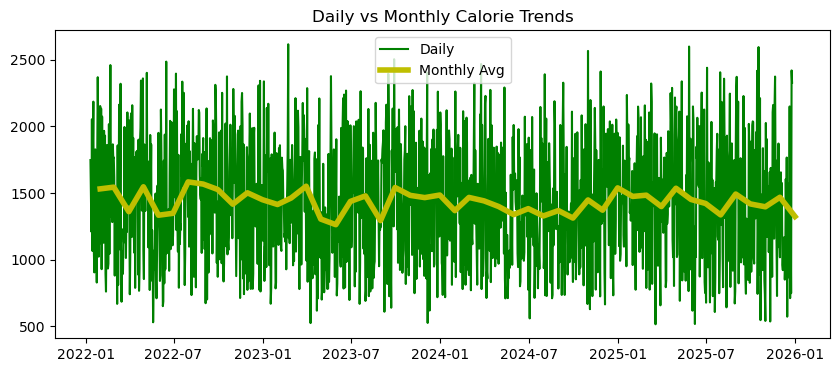

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(daily_calories_resampled, 
         c="g", label="Daily")
plt.plot(monthly_calories, 
         c="y", lw=4, label="Monthly Avg")
plt.legend()
plt.title("Daily vs Monthly Calorie Trends")
plt.show()

This single plot already shows:
- volatility at daily level
- stability at monthly level


## Rolling Window

Rolling windows answer questions like **What is the average calorie intake over the last 7 days?**

In [16]:
rolling_7d = daily_calories_resampled.rolling(window=7).mean()
rolling_7d[6:20]

Date
2022-01-17    1650.000000
2022-01-18    1552.571429
2022-01-19    1474.428571
2022-01-20    1500.142857
2022-01-21    1467.857143
2022-01-22    1461.000000
2022-01-23    1361.714286
2022-01-24    1168.000000
2022-01-25    1268.571429
2022-01-26    1477.571429
2022-01-27    1562.000000
2022-01-28    1447.142857
2022-01-29    1589.000000
2022-01-30    1586.142857
Freq: D, Name: Calories, dtype: float64

### Comparing Daily vs Rolling Average

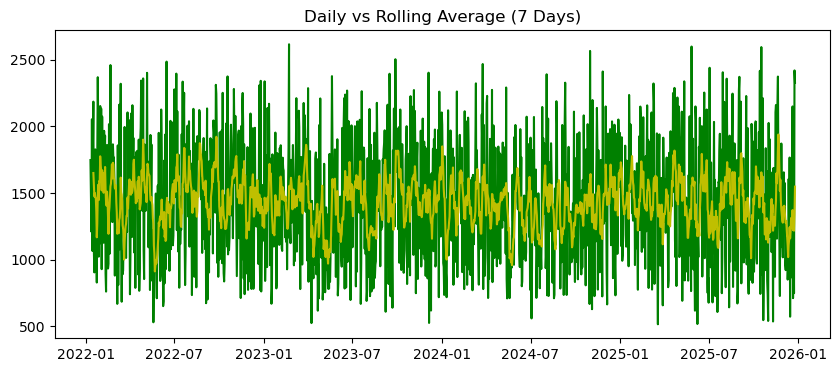

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(daily_calories_resampled, 
         c="g", label="Daily")
plt.plot(rolling_7d, 
         c="y", label="7-Day Rolling Avg")
plt.title("Daily vs Rolling Average (7 Days)")
plt.show()

### Comparing Rolling Averages (7 Days vs 30 Days)

Okay, let's see what happens when we compare rolling averages with different window sizes (7-day vs 30-day) to see how smoothing levels affect trends.

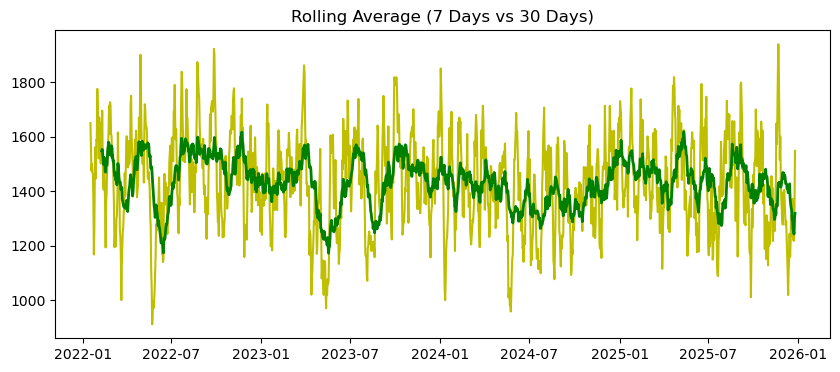

In [18]:
rolling_30d = daily_calories_resampled.rolling(window=30).mean()

plt.figure(figsize=(10, 4))
plt.plot(rolling_7d, 
         c="y", label="7-Day Rolling Avg")
plt.plot(rolling_30d, 
         c="g", lw=2, label="30-Day Rolling Avg")
plt.title("Rolling Average (7 Days vs 30 Days)")
plt.show()

#### What can we Observe in this plot?

- The yellow line (7-day rolling average) is much more jagged and follows short-term fluctuations closely.
- The green line (30-day rolling average) is smoother, showing a clearer long-term trend by averaging out more noise.

#### Why is this happening?

- A 7-day window smooths out just one week, so it still captures a lot of the weekly ups and downs.
- A 30-day window averages over a full month, so it filters out much of the short-term variation and reveals underlying patterns better.